In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('energydata_complete.csv')

In [79]:
column_names = {'lights':'Lights', 
'T1': 'T1_Kitchen_Area',
'RH_1': 'RH1_Kitchen_area', 
'T2': 'T2_Living_Room', 
'RH_2': 'RH2_Living_Room',
'T3': 'T3_Laundry_Room', 
'RH_3': 'RH3_Laundry_Room',
'T4': 'T4_Office_Room',
'RH_4': 'RH4_Office_Room',
'T5': 'T5_Bathroom',
'RH_5': 'RH5_Bathroom', 
'T6': 'T6_Outside_North', 
'RH_6': 'RH6_Outside_North',
'T7': 'T7_Ironing_Room', 
'RH_7': 'RH7_Ironing_Room',
'T8': 'T8_Teenager_Room',
'RH_8': 'RH8_Teenager_Room',
'T9': 'T9_Parents_Room',
'RH_9': 'RH9_Parents_Room'}

In [80]:
df = df.rename(columns=column_names)

In [81]:
df.head()

,date,Appliances,Lights,T1_Kitchen_Area,RH1_Kitchen_area,T2_Living_Room,RH2_Living_Room,T3_Laundry_Room,RH3_Laundry_Room,T4_Office_Room,...,T9_Parents_Room,RH9_Parents_Room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Model slope: 2.2251
Model intercept: -37.3495
[[-1.52603433]
 [29.08339347]]
R-squared:  0.6418990830855493
RMSE is 3.6444644873484573


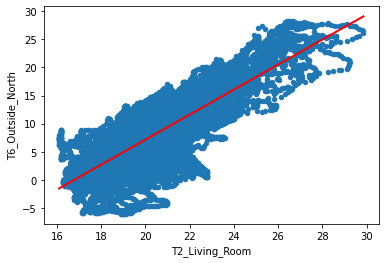

In [77]:
# QUESTION 12

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(y, predicted)))
    print('RMSE is {}'.format(rmse))

model = LinearRegression(fit_intercept=True)
model.fit(df['T2_Living_Room'].values.reshape(-1,1), df['T6_Outside_North'].values.reshape(-1,1))

# Check model coefficients & intercept
print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' %model.intercept_)

# Make predictions for min and max x and store them
x_lsl = [[df['T2_Living_Room'].min()],[df['T2_Living_Room'].max()]]
y_lsl = model.predict(x_lsl)
print (y_lsl)

# Plot the observed data
df.plot(kind='scatter', x='T2_Living_Room', y='T6_Outside_North')

# Plot the least squares line
plt.plot(x_lsl, y_lsl, c='red', linewidth=2)

#calculate the R^2
print("R-squared: ", model.score(df['T2_Living_Room'].values.reshape(-1,1), df['T6_Outside_North'].values.reshape(-1,1))
)
RMSE(model, df['T2_Living_Room'].values.reshape(-1,1), df['T6_Outside_North'].values.reshape(-1,1))

MULTIPLE LINEAR REGRESSION

In [82]:
to_drop = ['date', 'Lights']

df_2 = df.drop(to_drop, axis=1)
df_2.head()

,Appliances,T1_Kitchen_Area,RH1_Kitchen_area,T2_Living_Room,RH2_Living_Room,T3_Laundry_Room,RH3_Laundry_Room,T4_Office_Room,RH4_Office_Room,T5_Bathroom,...,T9_Parents_Room,RH9_Parents_Room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [84]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)
features_df = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target,
test_size=0.3, random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [86]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [87]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [88]:
train_acc = linear_model.score(x_train, y_train) #training accuracy
test_acc = linear_model.score(x_test, y_test) #test accuracy

print('Train Accuracy', train_acc)
print('Test Accuracy', test_acc)

Train Accuracy 0.14471942308518737
Test Accuracy 0.14890246319303535


In [89]:
#QUESTION 13 - MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [90]:
#QUESTION 14 - RSS
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [91]:
#QUESTION 15 - RMS
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [92]:
#QUESTION 16 - Rsquared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [93]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [94]:
# Feature Selection and Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
    
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


In [95]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH2_Living_Room,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2_Living_Room,-0.236178,-0.193880,0.000000
3,T9_Parents_Room,-0.189941,-0.188584,-0.000000
4,RH8_Teenager_Room,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH7_Ironing_Room,-0.044614,-0.046291,-0.000000
7,RH9_Parents_Room,-0.039800,-0.041701,-0.000000
8,T5_Bathroom,-0.015657,-0.020727,-0.000000
9,T1_Kitchen_Area,-0.003281,-0.021549,0.000000


In [99]:
#QUESTION 18 - Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

#obtain predictions
predicted_values_ridge = ridge_reg.predict(x_test)

#RMS
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values_ridge))
round(rmse, 3)

0.088

In [100]:
#QUESTION19 - Lasso Regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
    
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [101]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH2_Living_Room,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2_Living_Room,-0.236178,-0.201397,0.000000
3,T9_Parents_Room,-0.189941,-0.188916,-0.000000
4,RH8_Teenager_Room,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH7_Ironing_Room,-0.044614,-0.045977,-0.000000
7,RH9_Parents_Room,-0.039800,-0.041367,-0.000000
8,T5_Bathroom,-0.015657,-0.019853,-0.000000
9,T1_Kitchen_Area,-0.003281,-0.018406,0.000000


In [102]:
#QUESTION 20 - Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#obtain predictions
predicted_values_ridge = lasso_reg.predict(x_test)

#RMS
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values_ridge))
round(rmse, 3)

0.094